# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Functions to detect & plot Outliers with different approaches:

def zscore_based_outliers(ys, threshold = 3):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.abs(z_scores) > threshold

def mad_based_outlier(ys, thresh=3.5):
    median = np.median(ys, axis=0)
    mad=np.median(np.array([np.abs(y - median)  for y in ys]))
    modified_z_score=[0.6745 *(y - median) / mad for y in ys]
    return np.abs(modified_z_score) > thresh


def iqr_based_outliers(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = np.abs(quartile_3 - quartile_1)
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (ys > upper_bound) | (ys < lower_bound)

def plot_outliers(x):
    fig, axes = plt.subplots(nrows=3)
    fig.set_size_inches(6, 6)
    for ax, func in zip(axes, [zscore_based_outliers, mad_based_outlier, iqr_based_outliers]):
        sns.distplot(x, ax=ax, rug=True, hist=True)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    
    axes[0].set_title('Zscore-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('IQR-based Outliers', **kwargs)
    
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [3]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/mpg/mpg.csv')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df['horsepower'] = df['horsepower'].apply(pd.to_numeric, errors='coerce')

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

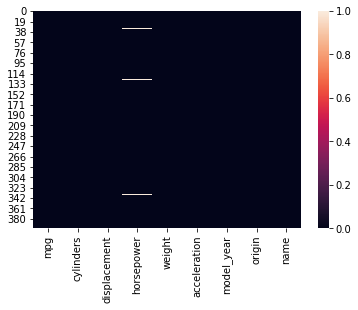

In [6]:
# To detect and see the Missing Values:
sns.heatmap(df.isnull())
df.isnull().sum()

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [9]:
# Continuous & Categorical variables:
L_con=['displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
L_cat=['origin', 'name', 'cylinders']

______________________________________________________________________
variable name:  mpg 

Statistical description: 
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Skewness =  0.45709232306041025
Kurtosis =  -0.5159934946351457


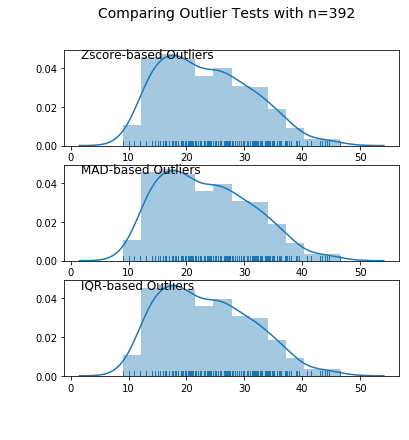

______________________________________________________________________
variable name:  displacement 

Statistical description: 
count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

Skewness =  0.7016690996581041
Kurtosis =  -0.778316930213621


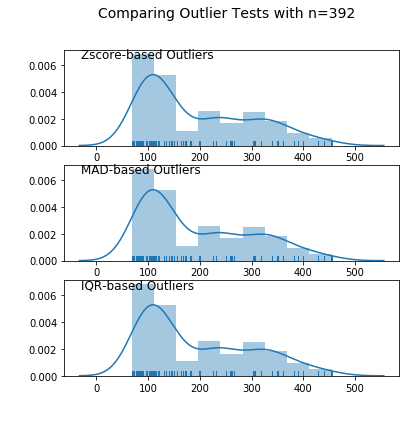

______________________________________________________________________
variable name:  horsepower 

Statistical description: 
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

Skewness =  1.0873262824048697
Kurtosis =  0.696946999742821


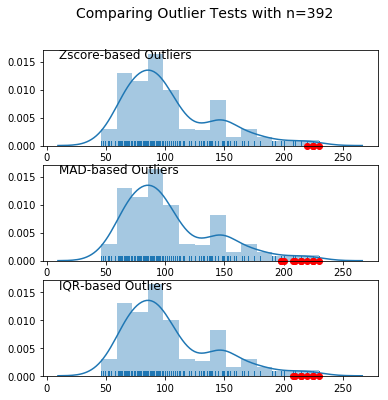

______________________________________________________________________
variable name:  weight 

Statistical description: 
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Skewness =  0.5195856740558396
Kurtosis =  -0.809259388327968


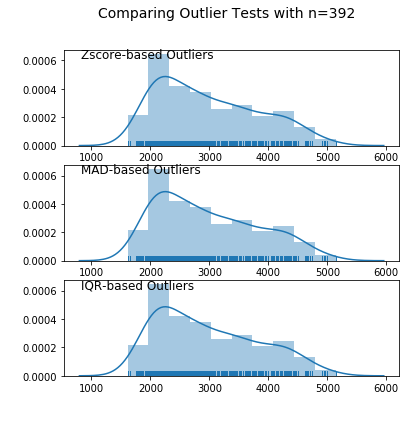

______________________________________________________________________
variable name:  acceleration 

Statistical description: 
count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

Skewness =  0.29158692574060485
Kurtosis =  0.4442335533547124


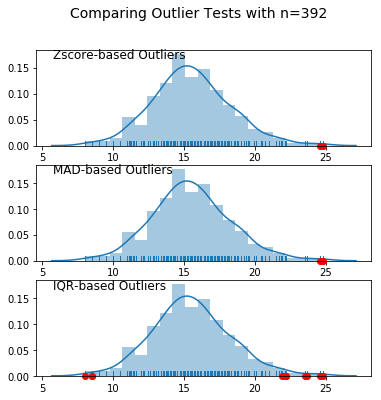

______________________________________________________________________
variable name:  model_year 

Statistical description: 
count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

Skewness =  0.019688299628885166
Kurtosis =  -1.167446220408874


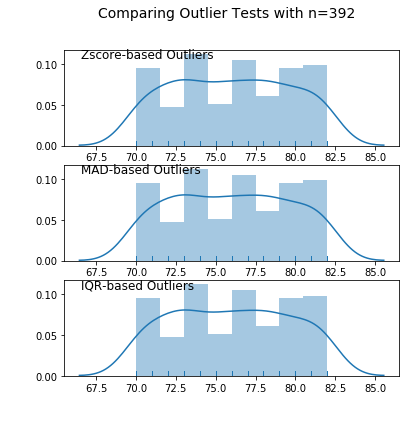

In [10]:
# Univariate analysis of Continuous varaibles: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
# of each continuous variable 
L=[]
for i in ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']:
    print('_'*70 )
    print('variable name: ', i, '\n')
    
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    
    if df[i].min()==0: 
        L.append(i)
    
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    #sns.distplot(df[i], kde=True)
    plot_outliers(np.array(df[i]))
    plt.show()

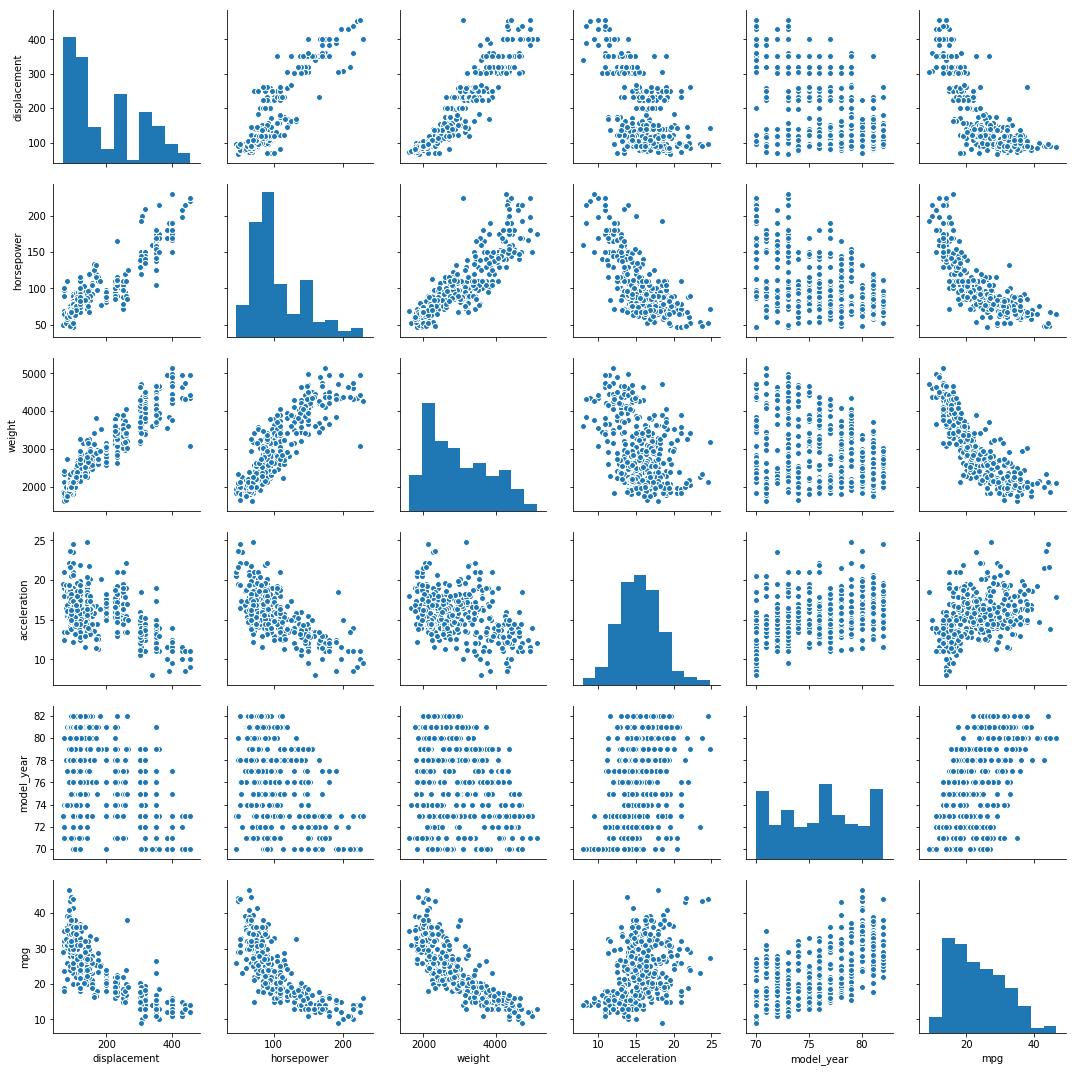

In [11]:
# Multi-variable analysis of Continuous Features: Pairplot of all continuous variables
sns.pairplot(pd.concat((df[L_con], df['mpg']), axis=1 ))

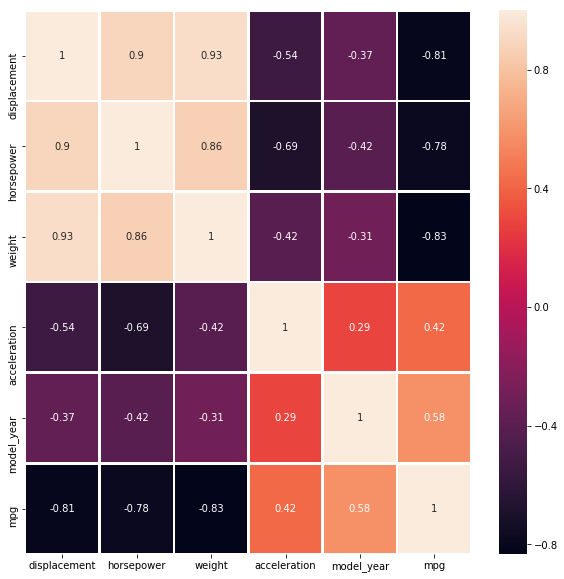

In [12]:
# Multivariable study: heatmap of correlation between continuous features
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pd.concat((df[L_con] ,df['mpg'] ), axis=1).corr(), annot=True, linewidths=1.5, ax=ax )

______________________________________________________________________
variable name:  displacement


<Figure size 432x432 with 0 Axes>

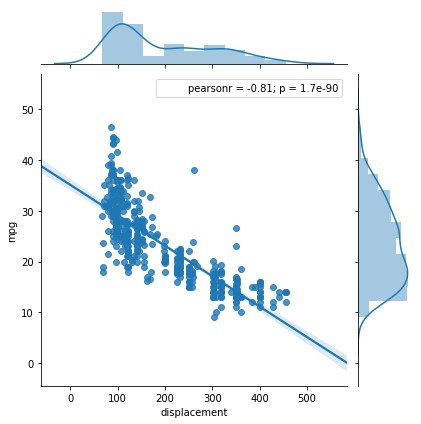

______________________________________________________________________
variable name:  horsepower


<Figure size 432x432 with 0 Axes>

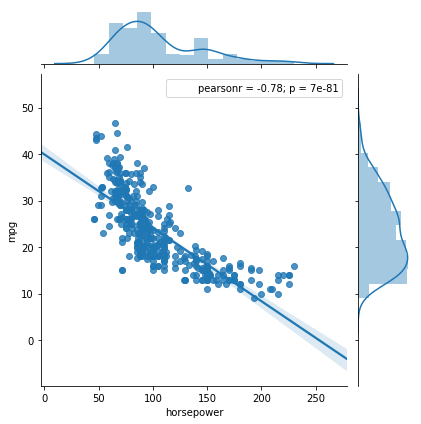

______________________________________________________________________
variable name:  weight


<Figure size 432x432 with 0 Axes>

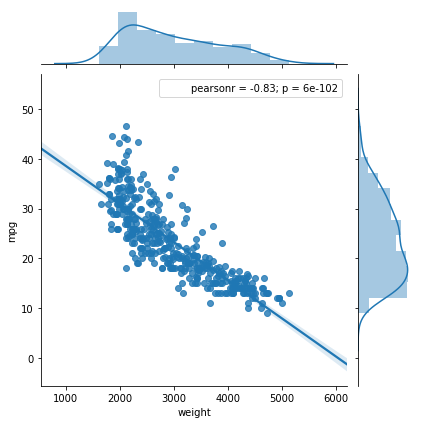

______________________________________________________________________
variable name:  acceleration


<Figure size 432x432 with 0 Axes>

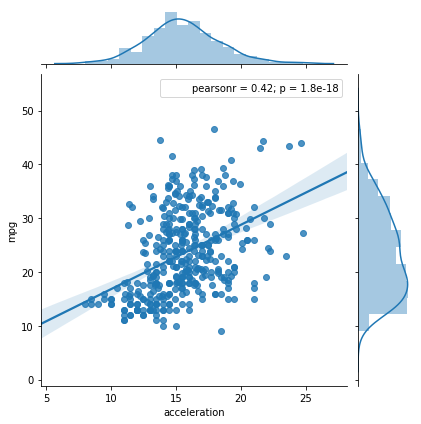

______________________________________________________________________
variable name:  model_year


<Figure size 432x432 with 0 Axes>

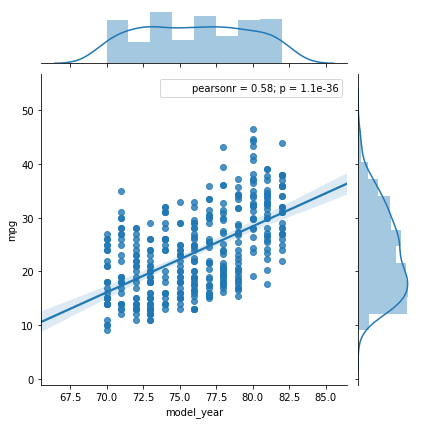

In [13]:
# Multivariable analysis of Contineous Features: Target variable Vs. feature 
for i in L_con:
    print('_'*70 )
    print('variable name: ', i)
    
    plt.figure(figsize=(6, 6))
    sns.jointplot( x=i, y='mpg', data=pd.concat((df[L_con], df['mpg']), axis=1), kind='reg')

    plt.show()

______________________________________________________________________
variable name:  mpg


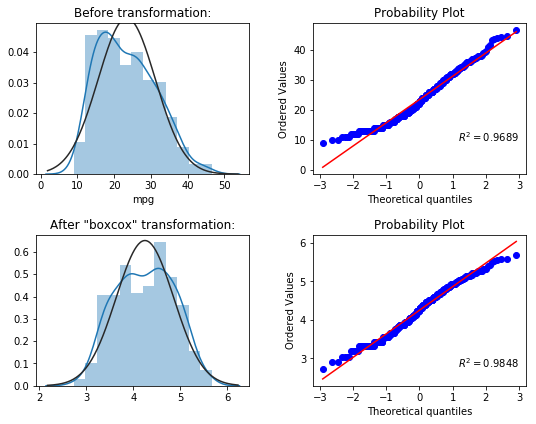

______________________________________________________________________
variable name:  displacement


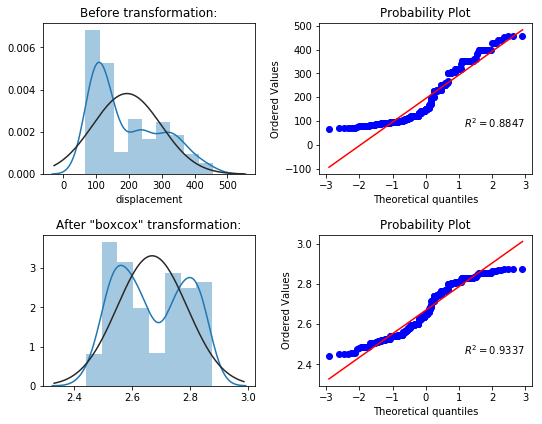

______________________________________________________________________
variable name:  horsepower


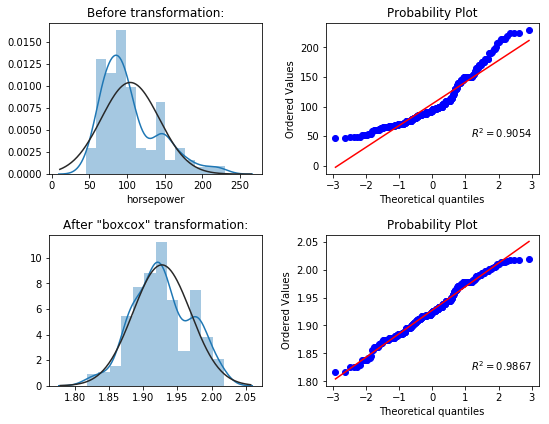

______________________________________________________________________
variable name:  acceleration


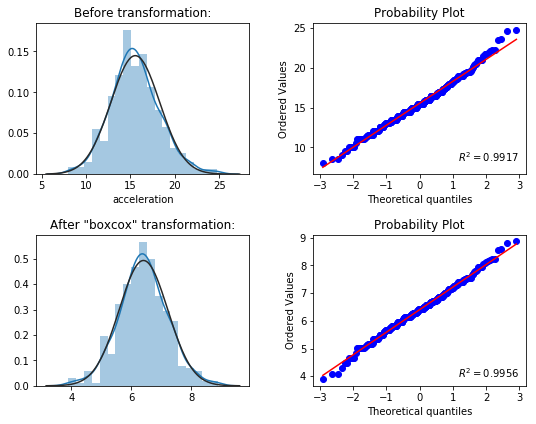

______________________________________________________________________
variable name:  model_year


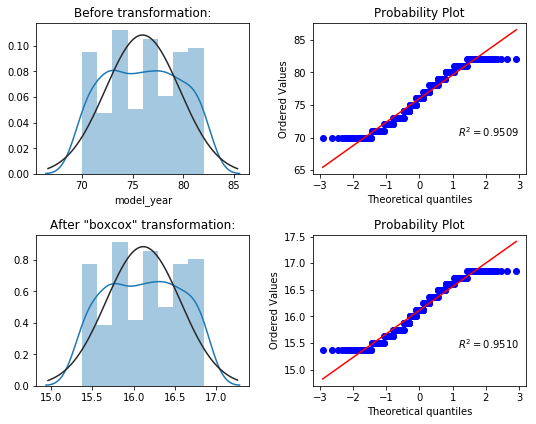

In [14]:
# To test the Statistical Assumptions on Continuous variables: We Check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in ['mpg', 'displacement', 'horsepower', 'acceleration', 'model_year']:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    ax1.set_title('Before transformation:')
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.1
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    ax3.set_title('After "boxcox" transformation:')
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()

______________________________________________________________________
variable name:  origin


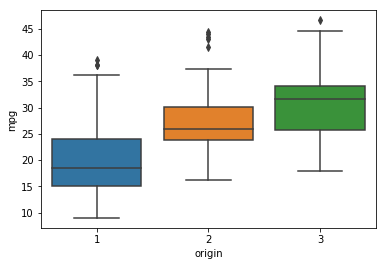

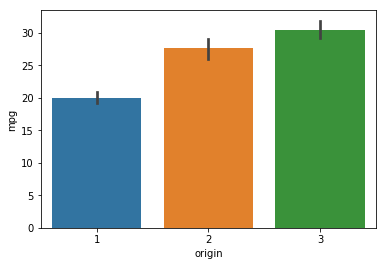

______________________________________________________________________
variable name:  cylinders


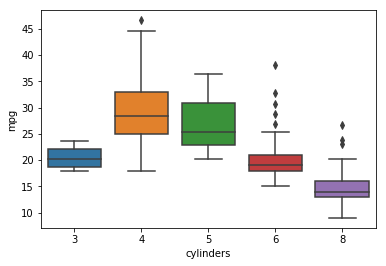

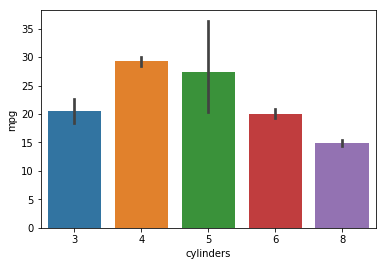

In [15]:
# Multivariable analysis of Categorical features: Boxplot & Barplot of target for different categories
for i in ['origin', 'cylinders']:
    print('_'*70 )
    print('variable name: ', i)
    
    sns.boxplot( x=i, y='mpg', data=df)
    plt.show()
    
    sns.barplot( x=i, y='mpg', data=df)
    plt.show()

______________________________________________________________________
variable name:  origin


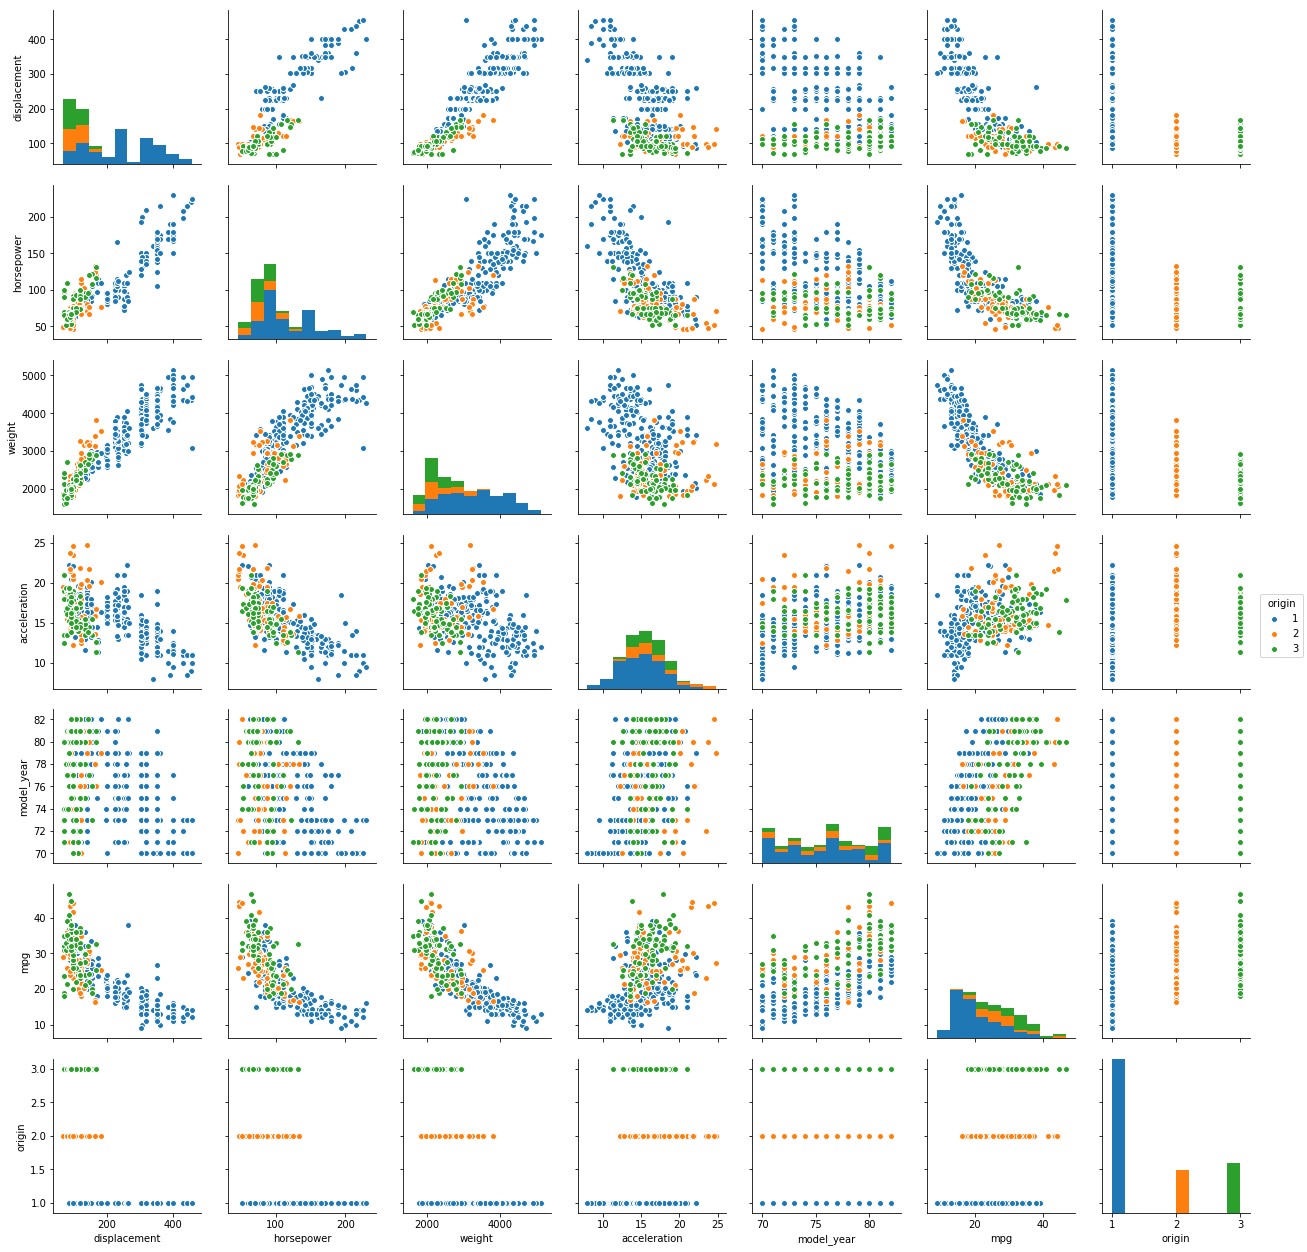

______________________________________________________________________
variable name:  cylinders


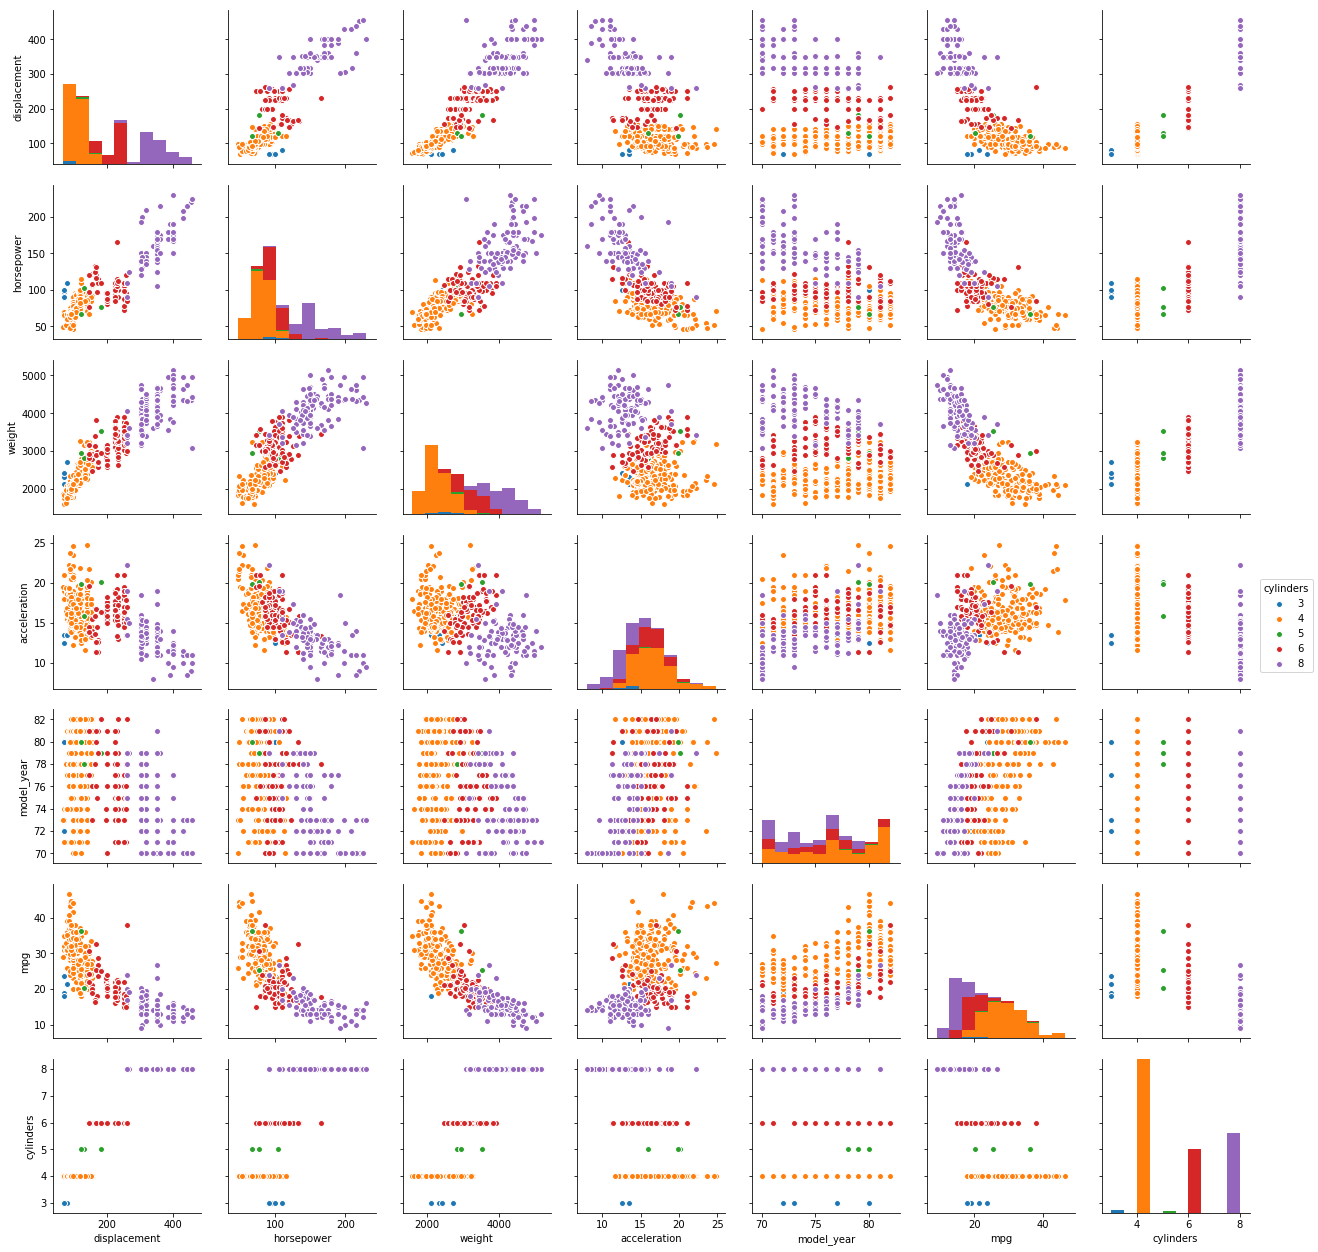

In [16]:
# Multivariable analysis of categorical features: Pairplot of Continuous variables
# for different categories of Categorical variables

for i in ['origin', 'cylinders']:
    print('_'*70 )
    print('variable name: ', i)

    sns.pairplot(pd.concat((df[L_con], df['mpg'], df[i]), axis=1 ), hue=i)
    plt.show()